# Error Backpropagation

The most popular way to train neural networks is with what is called the method of _backpropagation_. In it, we look to compute $\forall l\in\{1,\ldots,L\}, i,j. \frac{\partial E_n}{\partial w_{ji}^{(l)}}$

The required steps for backpropgation algorithm are:
1. Forward propagate an input $x_n$
2. Evaluate $\forall k. \delta_k^{L}$ at the output layer $L$
3. Backpropagate $\forall l\neq L, k. \delta_k^{l}$
4. Evaluate $\forall i,j. \frac{\partial E_n}{w_{i,j}}$

In [4]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from numpy.random import randn, seed

In [5]:
%config InlineBackend.figure_format = "retina"
np.set_printoptions(linewidth=150)

We will consider the example in section 5.3.2 of prml:
![Figure 5.1](./imgs/f51.png)

A two-layered neural network with sum of squares error as the error function; with linear output activation units, i.e., $y_k = a_k$ and; tanh (hyperbolic tangent) activation functions.

In [6]:
url = "https://www.itl.nist.gov/div898/strd/nls/data/LINKS/DATA/Gauss2.dat"
beacon = "Data:"
r = requests.get(url)
data = r.text
data = data[data.rfind(beacon) + len(beacon):]
data = np.array([v.split() for v in data.split("\n")][1:-1]).astype("float")

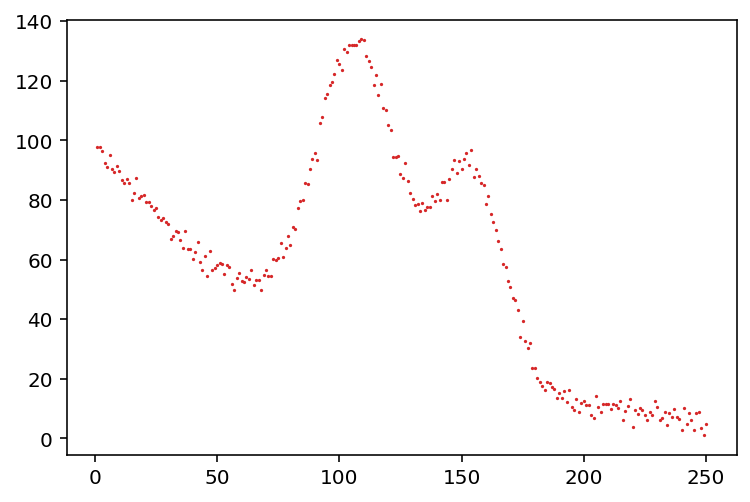

In [7]:
plt.scatter(data[:, 1], data[:,0], s=0.4, c="tab:red")

Suppose we have a two-layered neural network with $H$ hidden units; an input unit and a single output unit. The explicit form for this neural network is of the form:

$$
    f(x_n, {\bf w}^{1}, {\bf w}^{2}) = \sum_{k=1}^H w_{1k}^{(2)} h\left(w_{k1}^{(1}x_n + w_{k0}^{(1)}\right) + w_{10}^{(2)}
$$

Suppose further that this neural network has a tanh activation function.

In [8]:
seed(314)
w0 = randn(4, 2) / 10
w1 = randn(1, 5) / 10
alpha = 0.01

In [9]:
xn = np.array([[.5, 1]]).T

In [10]:
z1 = np.r_[[[1]], np.tanh(w0 @ xn)]
z1

array([[ 1.        ],
       [ 0.08628562],
       [-0.02808545],
       [ 0.0420584 ],
       [ 0.02707626]])

In [11]:
y = w1 @ z1

In [12]:
def forward_prop(x, w1, w2):
    a1 = w1 @ x
    z1 = np.r_[[[1]], np.tanh(a1)]
    a2 = w2 @ z1
    return a1, a2

In [13]:
forward_prop(xn, w0, w1)

(array([[ 0.08650072],
        [-0.02809284],
        [ 0.04208323],
        [ 0.02708287]]), array([[-0.07429066]]))

In [14]:
x, t  = data[0]
x = np.array([[x, 1]]).T
a1, a2 = forward_prop(x, w0, w1)
# changes in weight at the second layer 
z1 = np.r_[[[1]], np.tanh(a1)]

In [15]:
d1 = a2.ravel()[0] - t
d0 = (1 - z1.T ** 2) * w1 * d1

In [16]:
# Derivative at the second layer
d1 * z1

array([[-0.88302248],
       [-0.82587532],
       [-0.88302236],
       [ 0.88302246],
       [ 0.85824532]])

In [17]:
# Derivative at the first layer
x @ d0[:, 1:]

array([[-9.31405337e-01,  6.66301529e-07,  4.86134130e-07,  2.37704994e-01],
       [-9.54428442e-03,  6.82771619e-09,  4.98150721e-09,  2.43580746e-03]])

In [18]:
# Value updates at the second layer
w1 - alpha * (d1 * z1).T

array([[-0.06842732,  0.09455747, -0.01929578, -0.10202277, -0.05843618]])

In [19]:
# Value update at the first layer
w0 - alpha * (x @ d0[:, 1:]).T

array([[ 0.0259226 ,  0.07829189],
       [ 0.0852285 , -0.0707071 ],
       [-0.09316572,  0.08866609],
       [-0.02455602,  0.038148  ]])

## SGD

In [66]:
seed(314)
nhidden = 50
w0 = randn(nhidden, 2)
w1 = randn(1, nhidden + 1)
alpha = 0.01

In [71]:
that = []
epochs = 4
for e in range(epochs):
    for t, x in data:
        x = np.array([[1, x]]).T
        a1, a2 = forward_prop(x, w0, w1)
        # changes in weight at the second layer 
        z1 = np.r_[[[1]], np.tanh(a1)]

        d1 = a2.ravel()[0] - t
        d0 = (1 - z1.T ** 2) * w1 * d1

        w1 = w1 - alpha * (d1 * z1).T
        w0 = w0 - alpha * (x @ d0[:, 1:]).T 
for t, x in data:
    x = np.array([[1, x]]).T
    a1, a2 = forward_prop(x, w0, w1)
    that.append(a2.ravel()[0])

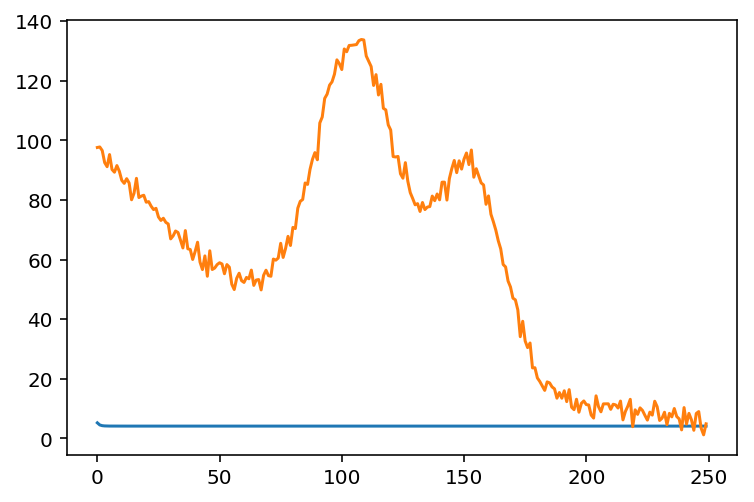

In [72]:
plt.plot(that)
plt.plot(data[:,0])

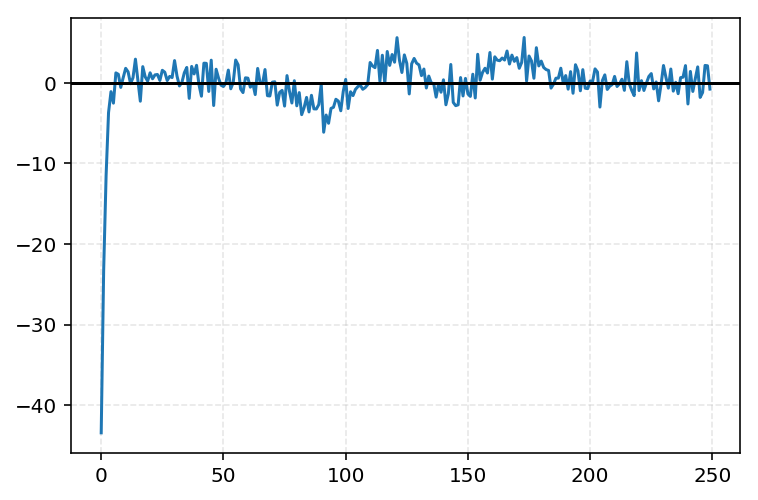

In [60]:
plt.plot(that - data[:,0])
plt.axhline(y=0, c="black")
plt.grid(alpha=0.3, linestyle="--")

In [61]:
that = []
for e in range(1):
    for t, x in data:
        x = np.array([[1, x]]).T
        a1, a2 = forward_prop(x, w0, w1)
        # changes in weight at the second layer 
        z1 = np.r_[[[1]], np.tanh(a1)]

        d1 = a2.ravel()[0] - t
        d0 = (1 - z1.T ** 2) * w1 * d1
        if e == 0:
            that.append(a2.ravel()[0])

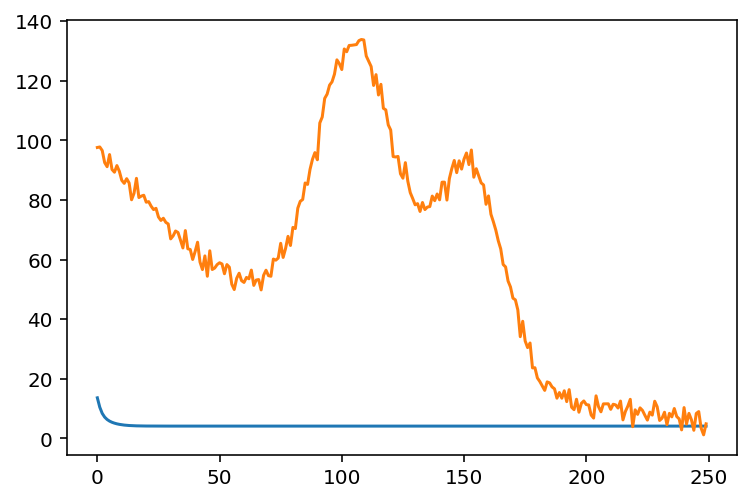

In [62]:
plt.plot(that)
plt.plot(data[:,0])